<a href="https://colab.research.google.com/github/sethkipsangmutuba/Machine-Learning/blob/main/a2.%20ML2_Seth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

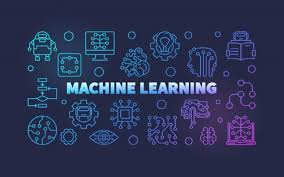

#  End-to-End Machine Learning Project — Lecture Notes

## Overview

This chapter walks through a full Machine Learning (ML) project from start to finish, simulating the role of a newly hired data scientist at a real estate company.

---

## Main Stages of an ML Project

- **Look at the big picture** – Understand the business problem  
- **Get the data** – Collect the relevant dataset  
- **Explore the data** – Visualize and analyze to discover patterns  
- **Prepare the data** – Clean, transform, and structure data for modeling  
- **Select a model** – Choose an appropriate ML algorithm  
- **Train the model** – Feed data to the algorithm to learn  
- **Fine-tune the model** – Optimize parameters and performance  
- **Present and deploy** – Report your findings and put the model into production  

---

## Working with Real Data

Real-world data introduces noise, inconsistencies, and missing values, providing more authentic learning.

**Sources of datasets:**

- UC Irvine ML Repository, Kaggle, AWS datasets  
- Meta-portals: dataportals.org, Quandl  
- Reddit Datasets, Wikipedia ML dataset list  

---

## Example Dataset: California Housing Prices

- Based on the 1990 US census data  
- Includes features like population, median income, and median housing value per district  

---

## Step 1: Look at the Big Picture

### Business Context

- **Task:** Predict median house values in California districts  
- **Use Case:** Feed predictions into an investment decision-making pipeline  
- **Goal:** Replace manual, expensive, and inaccurate human estimates  

### Define the Problem Type

- **Supervised Learning:** Labeled data with features and target value  
- **Regression Task:** Predict a continuous value (price)  
- **Multivariate Regression:** Multiple input features (e.g., population, income)  
- **Batch Learning:** Static data, no need for real-time updates  

---

## Step 2: Choose a Performance Metric

### Common Metrics for Regression:

#### Root Mean Squared Error (RMSE)

$$
RMSE(X, h) = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2 }
$$

- Penalizes larger errors more than smaller ones  
- Sensitive to outliers (uses squared differences)  

#### Mean Absolute Error (MAE)

$$
MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(x^{(i)}) - y^{(i)} \right|
$$

- Less sensitive to outliers  
- Uses absolute differences  

> Use RMSE when outliers are rare; use MAE if your dataset contains many outliers.

---

## Step 3: Verify Assumptions

Clarify downstream system expectations:

- Do they use the actual prices or categorize them (e.g., "cheap", "expensive")?

**Example:**  
If the system only cares about categories, the problem becomes classification, not regression.

**Action Point:** Talk to downstream teams to align objectives.

---

## Step 4: Get the Data

### Environment Setup

Use Python 3, recommended via Anaconda or virtualenv for isolated environments.

**Required libraries:**

- numpy  
- pandas  
- matplotlib  
- scikit-learn  
- jupyter  

---

## Step 5: Understanding Notation (Used in Formulas)

| Symbol | Meaning |
|--------|---------|
| $m$ | Number of instances |
| $x^{(i)}$ | Feature vector of the $i$-th instance |
| $y^{(i)}$ | Target value (label) of the $i$-th instance |
| $X$ | Matrix of all feature vectors |
| $h$ | Hypothesis function (model prediction) |
| $\hat{y}^{(i)}$ | Prediction for the $i$-th instance |
| $RMSE(X,h)$ | Cost function measuring prediction error |

---

## Bonus: Understanding Norms (Error Measures as Distance Metrics)

| Norm | Description | Example |
|------|-------------|---------|
| $\ell_2$ | Euclidean norm → Used in RMSE | Emphasizes large errors |
| $\ell_1$ | Manhattan norm → Used in MAE | Treats all errors equally |
| $\ell_k$ | General form | Higher $k$ = more focus on outliers |
| $\ell_\infty$ | Max norm | Measures only the largest deviation |

---

## Key Takeaways

- Always clarify the problem type and business goals before coding.  
- Performance metrics determine what success looks like.  
- Be mindful of data quality, assumptions, and evaluation strategy.  
- A well-structured ML pipeline makes the project reproducible and scalable.  
- Start simple, validate your approach, and evolve your solution iteratively.  


In [367]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Setup: imports
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib

# Constants
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# Function: Fetch the housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

# Function: Load the housing data into a DataFrame
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Download and load the data
fetch_housing_data()
housing = load_housing_data()

# Quick look at the data
print(housing.head())
print("\nInfo:\n")
print(housing.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 

In [368]:
# Value counts for categorical column
print("\nOcean proximity value counts:\n")
print(housing["ocean_proximity"].value_counts())



Ocean proximity value counts:

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [369]:
# Statistical summary
print("\nDescription of numerical attributes:\n")
housing.describe()



Description of numerical attributes:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


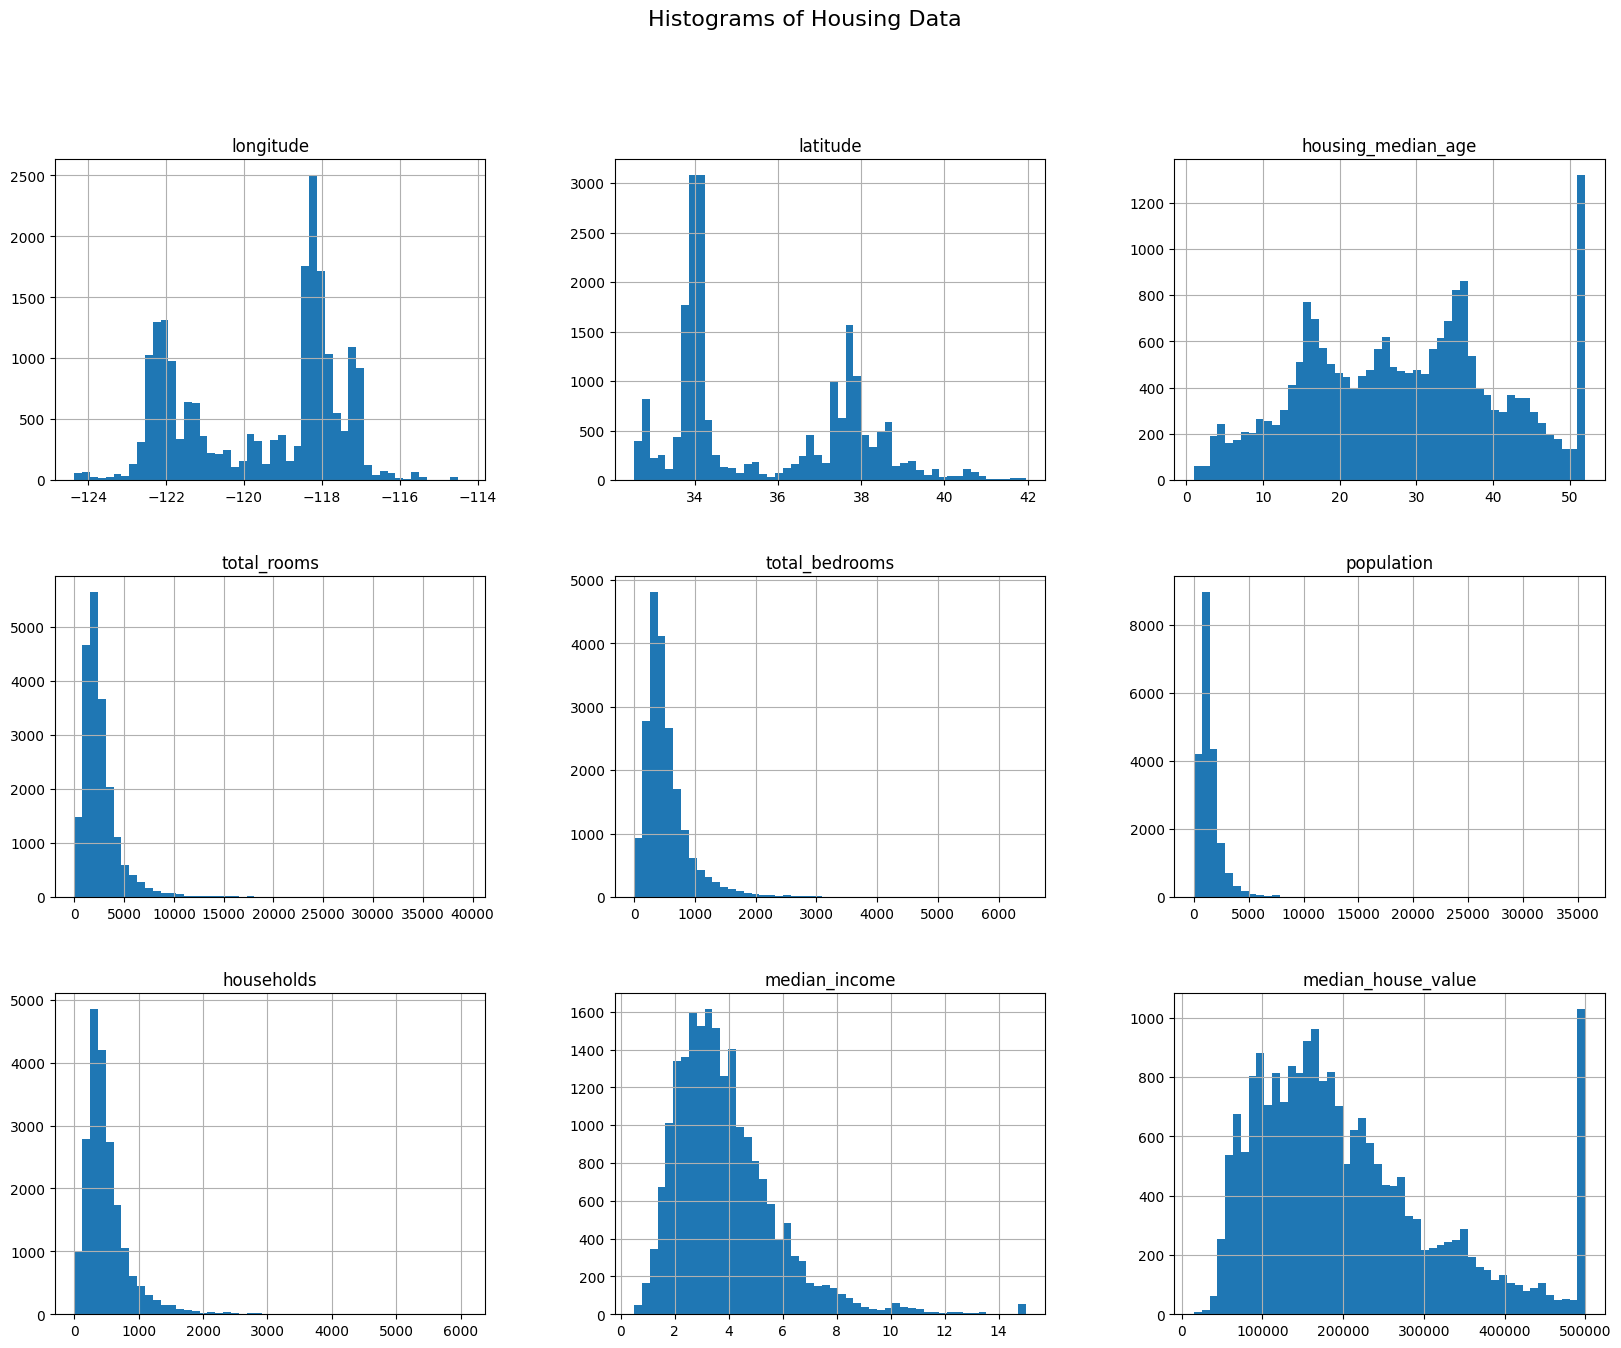

In [370]:
# Histograms of all numerical features
housing.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Housing Data", fontsize=16)
plt.show()

####Random Split (Basic)

In [371]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Basic random split
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


###Stable Split Using Hashing

In [372]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Use row index as stable ID
housing_with_id = housing.reset_index()  # adds 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


###Stable ID Using Coordinates (Optional)

In [373]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


###Built-in Random Split with Scikit-learn

In [374]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


###Stratified Sampling Based on Income

In [375]:
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing(as_frame=True)
housing = data.frame.copy()

# Rename to match original naming convention
housing.rename(columns={
    "MedInc": "median_income",
    "HouseAge": "housing_median_age",
    "AveRooms": "total_rooms",
    "AveBedrms": "total_bedrooms",
    "Population": "population",
    "AveOccup": "households",
    "Latitude": "latitude",
    "Longitude": "longitude",
    "MedHouseVal": "median_house_value"
}, inplace=True)

# Step 1: Create income category
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# Step 2: Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx].copy()
    strat_test_set = housing.loc[test_idx].copy()

# Step 3: Compare proportions
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize=True).sort_index()

comparison = pd.DataFrame({
    "Full Set": income_cat_proportions(housing),
    "Stratified Test Set": income_cat_proportions(strat_test_set)
})
print(comparison)

# Step 4: Drop income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


            Full Set  Stratified Test Set
income_cat                               
1.0         0.039826             0.039971
2.0         0.318847             0.318798
3.0         0.350581             0.350533
4.0         0.176308             0.176357
5.0         0.114438             0.114341


###Set up an exploration set

In [377]:
# Work on a copy of the training set to avoid modifying the original
housing = strat_train_set.copy()


##Visualizing Geographical Data
#####Basic Scatterplot (just locations)

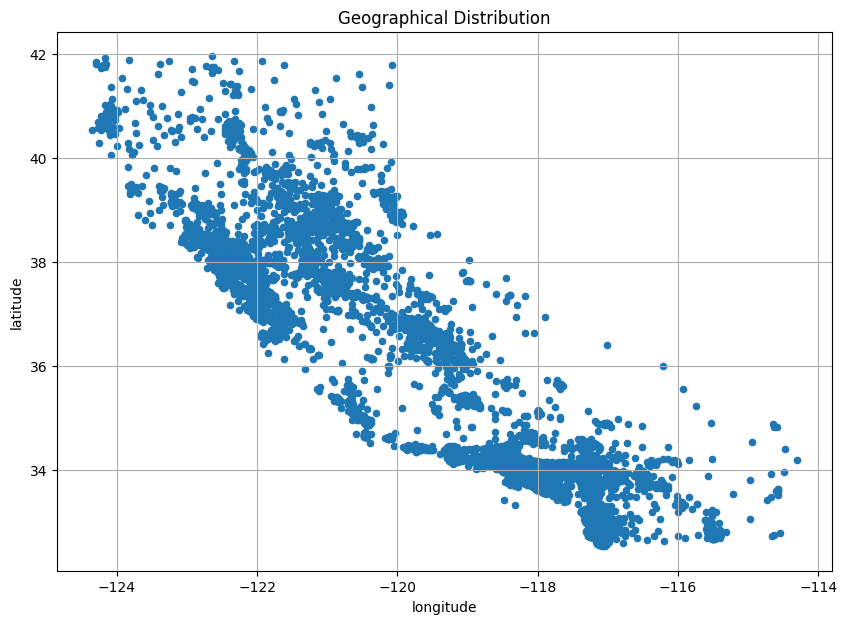

In [378]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.title("Geographical Distribution")
plt.grid(True)
plt.show()


###High-density scatterplot (alpha=0.1)

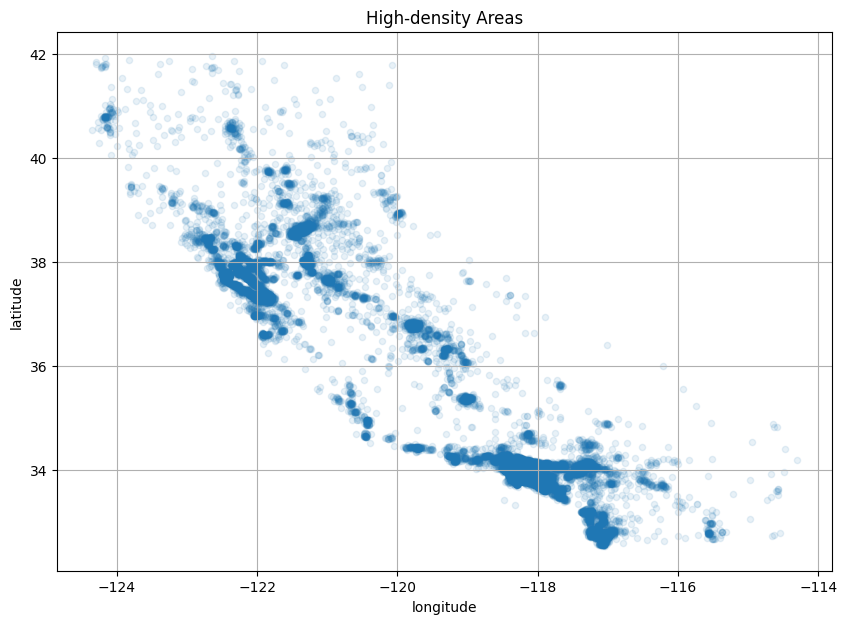

In [379]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10, 7))
plt.title("High-density Areas")
plt.grid(True)
plt.show()


###Prices & Population Overlay

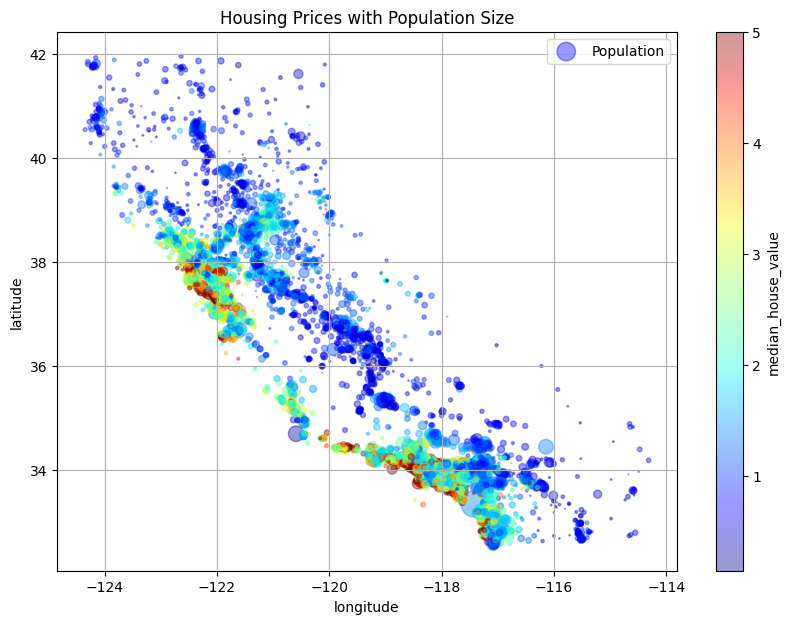

In [380]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"] / 100, label="Population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    figsize=(10, 7)
)
plt.legend()
plt.title("Housing Prices with Population Size")
plt.grid(True)
plt.show()


###Correlation Matrix

###Heatmap

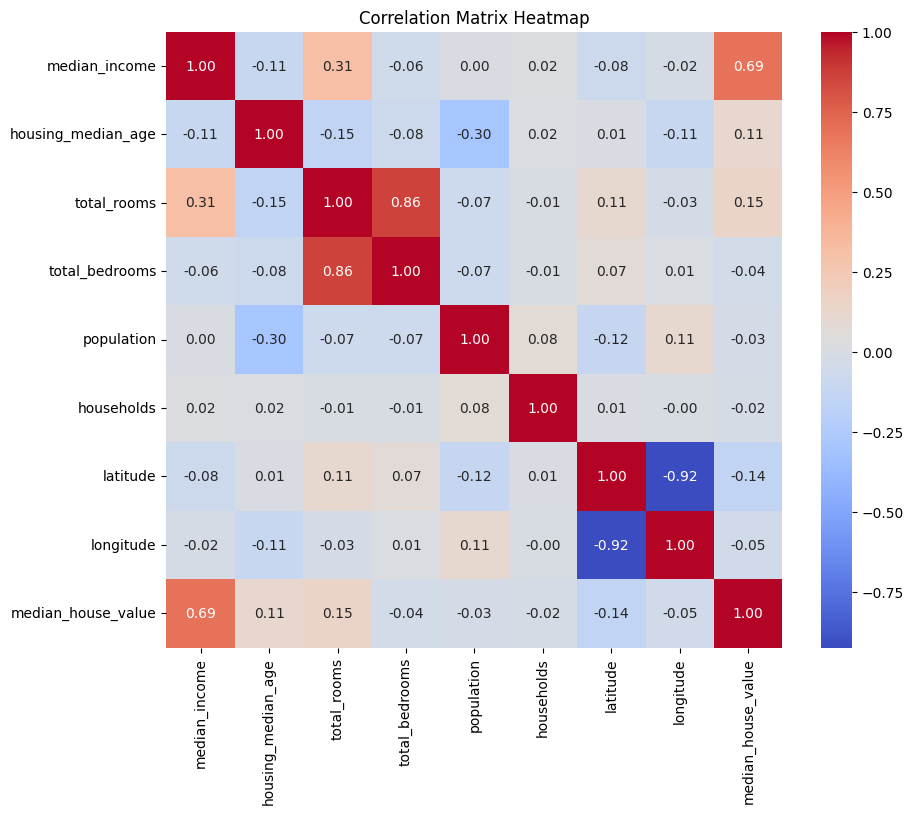

median_house_value    1.000000
median_income         0.687151
total_rooms           0.146255
housing_median_age    0.114146
households           -0.021991
population           -0.026882
total_bedrooms       -0.043294
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = housing.corr(numeric_only=True)

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Print sorted correlations with target
print(corr_matrix["median_house_value"].sort_values(ascending=False))


###Scatter Matrix of Key Attributes

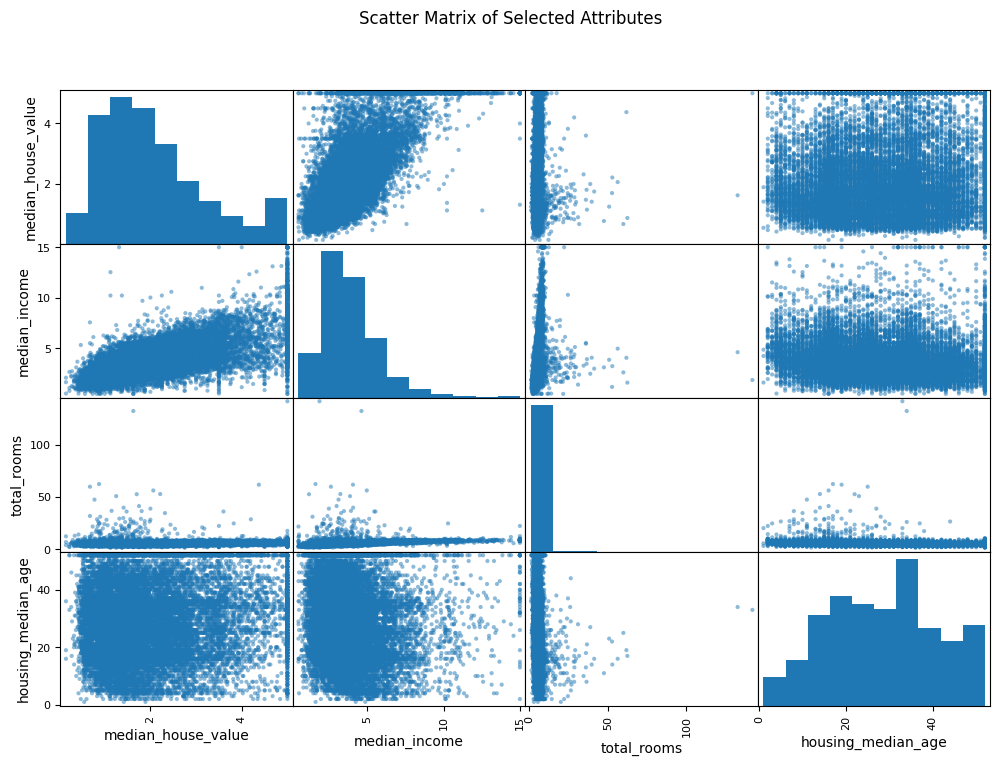

In [382]:
from pandas.plotting import scatter_matrix

# Select most promising features
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.suptitle("Scatter Matrix of Selected Attributes")
plt.show()


###Focused Scatter Plot: Income vs House Value

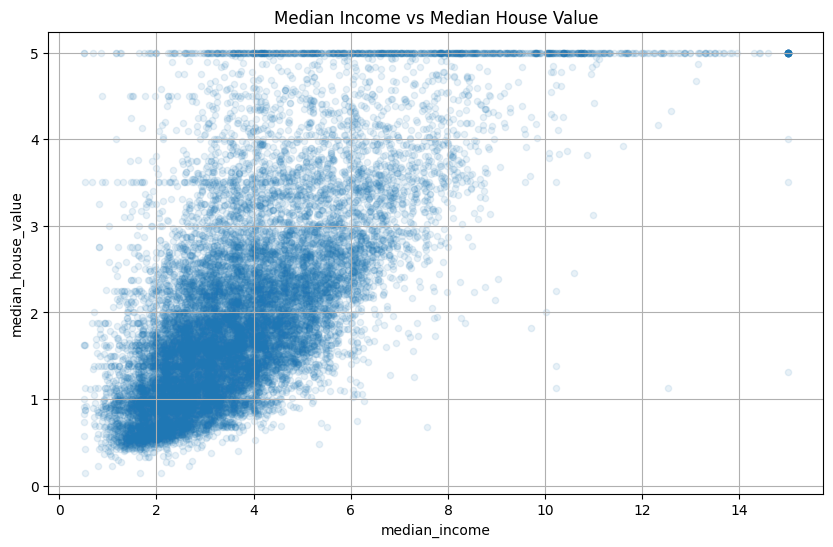

In [383]:
housing.plot(
    kind="scatter", x="median_income", y="median_house_value",
    alpha=0.1, figsize=(10, 6)
)
plt.title("Median Income vs Median House Value")
plt.grid(True)
plt.show()


###Add Combined Attributes

In [384]:
# Add engineered features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]


###Recompute Correlation Matrix

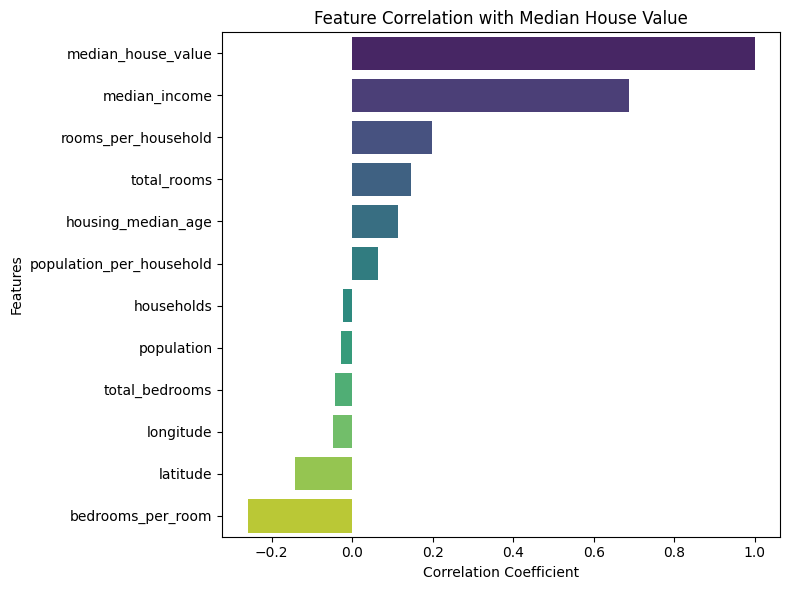

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recompute correlation matrix with new features
corr_matrix = housing.corr(numeric_only=True)

# Sort correlations with the target variable
target_corr = corr_matrix["median_house_value"].sort_values(ascending=False)

# Visualize top correlations with the target
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Feature Correlation with Median House Value")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


###Attribute Engineering and Correlation Analysis

In [386]:
# Create new combined attributes
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Compute and display the correlation matrix
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.199420
total_rooms,0.146255
housing_median_age,0.114146
population_per_household,0.064590
households,-0.021991
population,-0.026882
total_bedrooms,-0.043294
longitude,-0.047466


### Revert to a Clean Training Set

In [387]:
# Separate predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


###Handle Missing Values with Scikit-Learn’s SimpleImputer

In [388]:
# Drop 'ocean_proximity' only if it's in the DataFrame
if "ocean_proximity" in housing.columns:
    housing_num = housing.drop("ocean_proximity", axis=1)
else:
    housing_num = housing.copy()


In [389]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_tr

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70
...,...,...,...,...,...,...,...,...
15174,5.0900,14.0,6.658342,1.229770,2026.0,2.023976,33.03,-117.07
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42
19263,3.1797,48.0,4.110465,0.965116,458.0,2.662791,38.44,-122.72
19140,4.1964,14.0,6.297405,1.157685,1208.0,2.411178,38.31,-122.70


###3 useful attribute combinations discussed earlier:

In [390]:
housing_num["rooms_per_household"] = housing_num["total_rooms"] / housing_num["households"]
housing_num["bedrooms_per_room"] = housing_num["total_bedrooms"] / housing_num["total_rooms"]
housing_num["population_per_household"] = housing_num["population"] / housing_num["households"]


###Correlation with Target

In [391]:
housing_num["median_house_value"] = housing_labels  # temporarily attach label

# Compute correlation matrix
corr_matrix = housing_num.corr()

# Display correlations with median house value
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Optionally remove target again
housing_num.drop("median_house_value", axis=1, inplace=True)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.199420
total_rooms                 0.146255
housing_median_age          0.114146
population_per_household    0.064590
households                 -0.021991
population                 -0.026882
total_bedrooms             -0.043294
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259934
Name: median_house_value, dtype: float64


In [392]:
#  Required Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Numerical Pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

#  Apply Pipeline
housing_prepared = num_pipeline.fit_transform(housing_num)
housing_prepared

array([[-0.8936472 ,  0.02756357,  0.01739526, ..., -0.20707395,
        -0.12449975,  0.55628602],
       [ 1.292168  , -1.72201763,  0.56925554, ...,  0.54122547,
        -0.90901266,  0.72131799],
       [-0.52543365,  1.22045984, -0.01802432, ...,  0.36469267,
        -0.37148599, -0.52440722],
       ...,
       [-0.36547546,  1.53856552, -0.5092404 , ..., -0.36158832,
         0.38049366, -0.86511838],
       [ 0.16826095, -1.1653327 ,  0.32814891, ...,  0.51780685,
        -0.50655192,  0.01061579],
       [-0.390569  , -0.13148926,  0.01407228, ..., -0.21113844,
        -0.12515371, -0.79857323]])

###Clean Code to Reset + Prepare for OneHotEncoding

In [393]:
import os
import tarfile
import pandas as pd
from six.moves import urllib
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

# Constants
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# Fetch + Load housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Load fresh dataset
fetch_housing_data()
housing = load_housing_data()

# Create income category for stratification
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., float("inf")],
                               labels=[1, 2, 3, 4, 5])

# Stratified train/test split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Remove income_cat from copies
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Work with a clean training set
housing = strat_train_set.copy()

# Confirm ocean_proximity exists
print(housing["ocean_proximity"].value_counts())


ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64


In [394]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

# Optional: Convert to array
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

###One-Hot Encoding Category Order

In [395]:
print(encoder.categories_)


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


####Custom Transformer

In [396]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Column indices
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Example usage
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing_num.values)
housing_extra_attribs

array([[2.17360000e+00, 2.90000000e+01, 5.48583569e+00, ...,
        2.93067286e-02, 8.22574050e-02, 1.98158344e+03],
       [6.33730000e+00, 7.00000000e+00, 6.92708333e+00, ...,
        3.36440390e-02, 7.92897527e-02, 1.80996491e+03],
       [2.87500000e+00, 4.40000000e+01, 5.39333333e+00, ...,
        2.92149656e-02, 6.28592970e-02, 6.45483871e+02],
       ...,
       [3.17970000e+00, 4.80000000e+01, 4.11046512e+00, ...,
        2.51070832e-02, 6.92713501e-02, 4.74554217e+02],
       [4.19640000e+00, 1.40000000e+01, 6.29740519e+00, ...,
        3.02188627e-02, 6.29385968e-02, 1.04346207e+03],
       [3.13190000e+00, 2.70000000e+01, 5.47715736e+00, ...,
        2.81937341e-02, 7.93742515e-02, 5.54617117e+02]])

### Custom Transformer: DataFrameSelector

In [397]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


###Combined Attribute Adder

In [398]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


###Numerical Pipeline

In [399]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing.drop("ocean_proximity", axis=1))

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])


###Categorical Pipeline

In [400]:
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False)),
])


###Full Pipeline Using FeatureUnion

In [401]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])


###Transform the Data

In [402]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)


(16512, 17)


#Selecting and training your models

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Try predictions
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

# Full training set RMSE
housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print("Linear Regression RMSE:", lin_rmse)


Predictions: [0.721 2.796 0.827 1.125 2.383]
Labels: [0.721, 2.796, 0.827, 1.125, 2.383]
Linear Regression RMSE: 1.985420331934847e-15


###Train Decision Tree Regressor

In [404]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print("Decision Tree RMSE (on training set):", tree_rmse)  # Expect ~0 due to overfitting


Decision Tree RMSE (on training set): 1.8797388271766097e-14


###Cross-Validation (for Decision Tree)

In [405]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Decision Tree Cross-Validation:")
display_scores(tree_rmse_scores)


Decision Tree Cross-Validation:
Scores: [0.00086077 0.00092386 0.00091027 0.00227321 0.00205224 0.00114725
 0.00120794 0.00117231 0.00088428 0.0008972 ]
Mean: 0.0012329316627484722
Standard deviation: 0.00048347724455680125


###Cross-Validation (for Linear Regression)

In [406]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Linear Regression Cross-Validation:")
display_scores(lin_rmse_scores)


Linear Regression Cross-Validation:
Scores: [9.02400179e-16 2.52647032e-15 3.02368979e-15 1.30241736e-15
 3.67063393e-15 1.16964167e-15 1.45667887e-15 2.70359355e-15
 2.35114112e-15 1.85158163e-15]
Mean: 2.095824842298394e-15
Standard deviation: 8.567798560157577e-16


###Train Random Forest Regressor

In [407]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

forest_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, forest_predictions))
print("Random Forest RMSE (on training set):", forest_rmse)


Random Forest RMSE (on training set): 0.00035245117820889376


###Cross-Validation (Random Forest)

In [408]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Random Forest Cross-Validation:")
display_scores(forest_rmse_scores)


Random Forest Cross-Validation:
Scores: [0.00052373 0.00052628 0.00079877 0.00225637 0.00057911 0.00094172
 0.00065061 0.00050299 0.00043564 0.00119598]
Mean: 0.0008411179493926568
Standard deviation: 0.0005219508931659204


###Save the Best Model (optional but recommended)

In [409]:
import joblib

joblib.dump(forest_reg, "random_forest_model.pkl")
# Later you can load with:
# forest_reg_loaded = joblib.load("random_forest_model.pkl")


['random_forest_model.pkl']

##Hyperparameter
###Grid Search for RandomForestRegressor

In [410]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Set up Grid Search
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

###Best Parameters & Estimator

In [411]:
# Best parameter combination
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_forest_model = grid_search.best_estimator_
print("Best Estimator:", best_forest_model)


Best Parameters: {'max_features': 8, 'n_estimators': 30}
Best Estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


###View CV Results

In [412]:
import numpy as np

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("RMSE: {:.2f}".format(np.sqrt(-mean_score)), params)


RMSE: 0.38 {'max_features': 2, 'n_estimators': 3}
RMSE: 0.27 {'max_features': 2, 'n_estimators': 10}
RMSE: 0.23 {'max_features': 2, 'n_estimators': 30}
RMSE: 0.18 {'max_features': 4, 'n_estimators': 3}
RMSE: 0.12 {'max_features': 4, 'n_estimators': 10}
RMSE: 0.10 {'max_features': 4, 'n_estimators': 30}
RMSE: 0.12 {'max_features': 6, 'n_estimators': 3}
RMSE: 0.06 {'max_features': 6, 'n_estimators': 10}
RMSE: 0.05 {'max_features': 6, 'n_estimators': 30}
RMSE: 0.05 {'max_features': 8, 'n_estimators': 3}
RMSE: 0.04 {'max_features': 8, 'n_estimators': 10}
RMSE: 0.02 {'max_features': 8, 'n_estimators': 30}
RMSE: 0.36 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
RMSE: 0.26 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
RMSE: 0.22 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
RMSE: 0.17 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
RMSE: 0.17 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
RMSE: 0.11 {'bootstrap': False, 'max_fea

### Optional: Randomized Search
Use this when the parameter space is large.

In [413]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(10, 200),
    'max_features': randint(2, 8),
}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                random_state=42, n_jobs=-1)

rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d48c7083950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d48c7122a90>},
                   random_state=42, scoring='neg_mean_squared_error')

###Save the Best Model

In [414]:
import joblib

joblib.dump(best_forest_model, "best_random_forest_model.pkl")


['best_random_forest_model.pkl']

###Feature Importance (from Best Model)

In [417]:
# Get feature importances from the best RandomForest model
final_model = rnd_search.best_estimator_
feature_importances = final_model.feature_importances_

# Construct the full attribute list (numerical + engineered + one-hot categorical)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Make sure encoder is the same OneHotEncoder used in the categorical pipeline
cat_one_hot_attribs = list(encoder.get_feature_names_out(["ocean_proximity"]))

# Full attribute list
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Sort and display features by importance
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)
for score, name in sorted_features:
    print(f"{name}: {score:.4f}")


median_house_value: 0.7164
median_income: 0.1248
ocean_proximity_INLAND: 0.0761
bedrooms_per_room: 0.0248
pop_per_hhold: 0.0156
rooms_per_hhold: 0.0136
latitude: 0.0074
longitude: 0.0071
ocean_proximity_<1H OCEAN: 0.0057
housing_median_age: 0.0032
population: 0.0012
total_rooms: 0.0011
households: 0.0010
total_bedrooms: 0.0010
ocean_proximity_NEAR BAY: 0.0008
ocean_proximity_NEAR OCEAN: 0.0003
ocean_proximity_ISLAND: 0.0000


In [419]:
housing = load_housing_data()

# Separate features and target early
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)


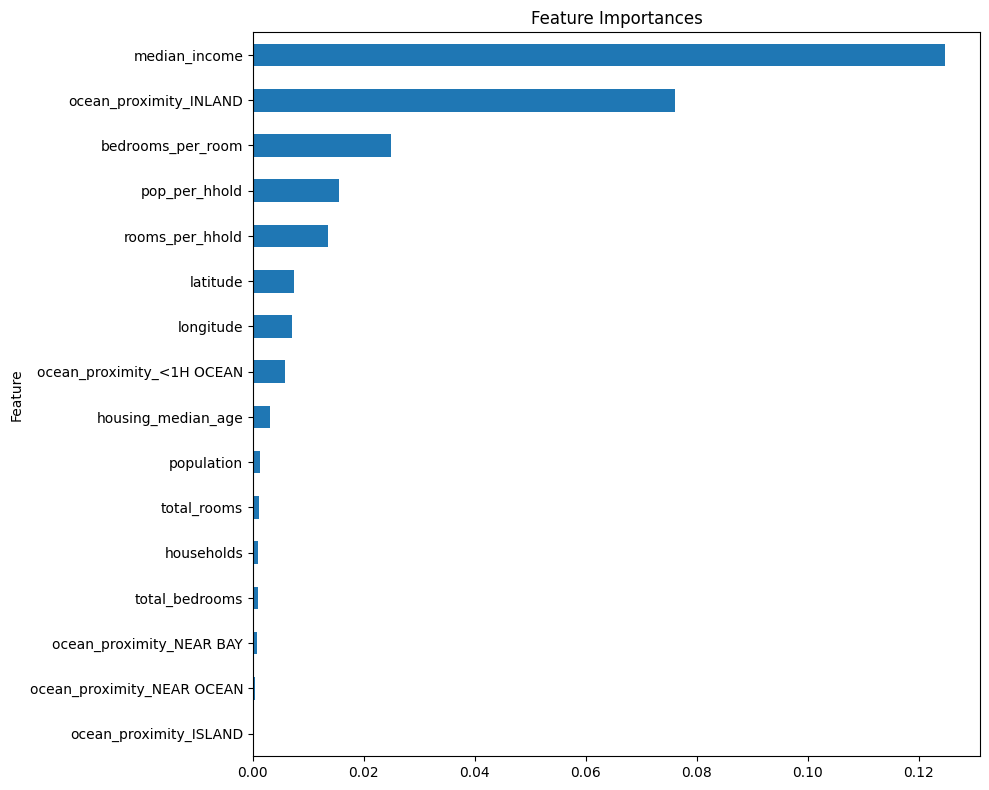

In [420]:
import matplotlib.pyplot as plt

# Convert to pandas for easy plotting
importances_df = pd.DataFrame(sorted_features, columns=["Importance", "Feature"])

# Drop median_house_value from chart if it snuck in
importances_df = importances_df[importances_df["Feature"] != "median_house_value"]

# Plot
importances_df.plot(kind="barh", x="Feature", y="Importance", figsize=(10, 8), legend=False)
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
